In [11]:
from sklearn import preprocessing

def encode_text_index(df,name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def encode_numeric_zscore(df,name,mean=None,sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name]-mean)/sd
    
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    if target_type in (np.int64, np.int32):
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)

    

In [12]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn import metrics

path = "./data/"

filename_read = os.path.join(path,"iris.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

encode_numeric_zscore(df,'sepal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'petal_w')
species = encode_text_index(df,'species')
num_classes = len(species)

x,y = to_xy(df,'species')

model_dir = 'tmp/iris' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    model_dir= model_dir,
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)

classifier.fit(x, y, steps=1000)

pred = list(classifier.predict(x, as_iterable=True))
score = metrics.accuracy_score(y, pred)
print("Final score: {}".format(score))

pred = list(classifier.predict(x, as_iterable=True))
predDF = pd.DataFrame(pred)
pred_nameDF = pd.DataFrame(species[pred])
actual_nameDF = pd.DataFrame(species[df['species']])

df2 = pd.concat([df,predDF,pred_nameDF,actual_nameDF],axis=1)
df2.columns = ['sepal_l','sepal_w','petal_l','petal_w','expected','predicted','expected_str','predicted_str']

df2



Final score: 0.9866666666666667


,sepal_l,sepal_w,petal_l,petal_w,expected,predicted,expected_str,predicted_str
0,-0.897674,1.015602,-1.335752,-1.311052,0,0,Iris-setosa,Iris-setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,0,0,Iris-setosa,Iris-setosa
2,-1.380727,0.327318,-1.392399,-1.311052,0,0,Iris-setosa,Iris-setosa
3,-1.501490,0.097889,-1.279104,-1.311052,0,0,Iris-setosa,Iris-setosa
4,-1.018437,1.245030,-1.335752,-1.311052,0,0,Iris-setosa,Iris-setosa
5,-0.535384,1.933315,-1.165809,-1.048667,0,0,Iris-setosa,Iris-setosa
6,-1.501490,0.786174,-1.335752,-1.179859,0,0,Iris-setosa,Iris-setosa
7,-1.018437,0.786174,-1.279104,-1.311052,0,0,Iris-setosa,Iris-setosa
8,-1.743017,-0.360967,-1.335752,-1.311052,0,0,Iris-setosa,Iris-setosa
9,-1.139200,0.097889,-1.279104,-1.442245,0,0,Iris-setosa,Iris-setosa


In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)



In [4]:
tf.logging.set_verbosity(tf.logging.INFO)



In [13]:
tf.logging.set_verbosity(tf.logging.ERROR)

sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = list(classifier.predict(sample_flower, as_iterable=True))
print("Ad hoc prediction - Predict that {} is: {}".format(sample_flower,species[pred]))

sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = list(classifier.predict(sample_flower, as_iterable=True))
print("Two sample flower predictions - Predict that {} is: {}".format(sample_flower,species[pred]))



Ad hoc prediction - Predict that [[ 5.  3.  4.  2.]] is: ['Iris-virginica']
Two sample flower predictions - Predict that [[ 5.   3.   4.   2. ]
 [ 5.2  3.5  1.5  0.8]] is: ['Iris-virginica' 'Iris-virginica']


In [19]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn import metrics
import pandas as pd
import os
from sklearn import preprocessing

tf.logging.set_verbosity(tf.logging.ERROR)

path = "./data/"

filename_read = os.path.join(path,"iris.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

encode_numeric_zscore(df,'sepal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'petal_w')
species = encode_text_index(df,'species')
num_classes = len(species)

x,y = to_xy(df,'species')

model_dir = 'tmp/iris' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    model_dir= model_dir,
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)

classifier.fit(x, y, steps=1000)

pred = list(classifier.predict(x, as_iterable=True))
score = metrics.accuracy_score(y, pred)
print("Accuarcy before save: {}".format(score))



Accuarcy before save: 1.0


In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.contrib.learn as learn
import numpy as np
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec

tf.logging.set_verbosity(tf.logging.ERROR)

path = "./data/"
    
filename = os.path.join(path,"iris.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])

encode_numeric_zscore(df,'petal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'sepal_l')
species = encode_text_index(df,"species")
num_classes = len(species)

x, y = to_xy(df,'species')
    
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model_dir = 'tmp/iris' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    model_dir= model_dir,
    config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1),
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)

validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test,
    y_test,
    every_n_steps=500,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=50)
    
classifier.fit(x_train, y_train,monitors=[validation_monitor],steps=10000)
    
pred = list(classifier.predict(x_test, as_iterable=True))
score = metrics.accuracy_score(y_test, pred)
print("Accuarcy before save: {}".format(score))    

Accuarcy before save: 0.9473684210526315


In [23]:
from IPython.display import display

tf.logging.set_verbosity(tf.logging.ERROR)

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred = list(classifier.predict_proba(x_test, as_iterable=True))

print("As percent probability")
print(pred[0]*100)

print("Numpy array of predictions")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))



As percent probability
[ 99.99   0.01   0.  ]
Numpy array of predictions


[array([ 0.9999,  0.0001,  0.    ], dtype=float32),
 array([ 0.9992,  0.0008,  0.    ], dtype=float32),
 array([ 0.    ,  0.273 ,  0.7269], dtype=float32),
 array([ 1.,  0.,  0.], dtype=float32),
 array([ 0.9999,  0.0001,  0.    ], dtype=float32)]

Log loss score: 0.1511291688804347


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12470b080>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'tf_random_seed': None, 'save_summary_steps': 100, 'save_checkpoints_secs': 1, 'save_checkpoints_steps': None, 'keep_checkpoint_max': 5, 'keep_checkpoint_every_n_hours': 10000}
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
sepa

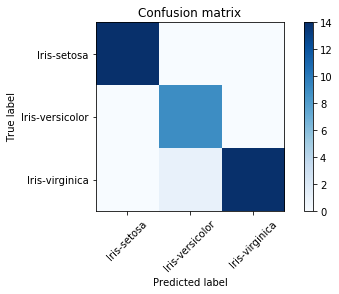

In [25]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.contrib.learn as learn
import numpy as np
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec
from sklearn.metrics import confusion_matrix

tf.logging.set_verbosity(tf.logging.ERROR)

path = "./data/"
    
filename = os.path.join(path,"iris.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])

encode_numeric_zscore(df,'petal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'sepal_l')
species = encode_text_index(df,"species")
num_classes = len(species)

x, y = to_xy(df,'species')
    
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model_dir = 'tmp/iris' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    model_dir= model_dir,
    config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1),
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)

validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test,
    y_test,
    every_n_steps=500,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=50)
    
classifier.fit(x_train, y_train,monitors=[validation_monitor],steps=10000)
    
pred = list(classifier.predict(x_test, as_iterable=True))
cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, species)
plt.show()



In [26]:
import tensorflow.contrib.learn as learn
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold

tf.logging.set_verbosity(tf.logging.ERROR)

path = "./data/"
filename_read = os.path.join(path,"iris.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

encode_numeric_zscore(df,'sepal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'petal_w')
species = encode_text_index(df,'species')
num_classes = len(species)

x,y = to_xy(df,'species')

kf = KFold(5)
    
all_y_test = []
all_y_pred = []
fold = 0
for train, test in kf.split(x):        
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model_dir = 'tmp/irisKF' + str(fold)

    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
    classifier = learn.DNNClassifier(
    model_dir= model_dir,
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)

    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
        x_test,
        y_test,
        every_n_steps=50,
        early_stopping_metric="loss",
        early_stopping_metric_minimize=True,
        early_stopping_rounds=50)
    
    classifier.fit(x, y, steps=1000)

    pred = list(classifier.predict(x_test, as_iterable=True))
    
    all_y_test.append(y_test)
    all_y_pred.append(pred)        

    score = np.sqrt(metrics.accuracy_score(pred,y_test))
    print("Fold score (Accuracy): {}".format(score))


all_y_test = np.concatenate(all_y_test)
all_y_pred = np.concatenate(all_y_pred)
score = np.sqrt(metrics.accuracy_score(all_y_pred,all_y_test))
print()
print("Cross-validated score (Accuracy): {}".format(score))    
    


Fold #1
Fold score (Accuracy): 1.0
Fold #2
Fold score (Accuracy): 1.0
Fold #3
Fold score (Accuracy): 0.983192080250175
Fold #4
Fold score (Accuracy): 1.0
Fold #5
Fold score (Accuracy): 0.983192080250175

Cross-validated score (Accuracy): 0.993310961716756
